## Amex Hackathon

In [1]:
import os

import pandas as pd
import numpy as np

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Notebook.ipynb',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [3]:
df = pd.read_csv('train.csv')

In [175]:
def std_col_names(df):
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    df.rename(columns = {'product_holding_b1': 'b1','product_holding_b2': 'b2'}, inplace= True)
    df['is_active'] = df['is_active'].astype('object')
    return df
df = std_col_names(df)

In [5]:
df.head()

,customer_id,gender,age,vintage,is_active,city_category,customer_category,product_holding_b1,product_holding_b2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


In [6]:
df.rename(columns = {'product_holding_b1': 'b1','product_holding_b2': 'b2'}, inplace= True)
df.head()

,customer_id,gender,age,vintage,is_active,city_category,customer_category,b1,b2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37748 entries, 0 to 37747
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        37748 non-null  object
 1   gender             37748 non-null  object
 2   age                37748 non-null  int64 
 3   vintage            37748 non-null  int64 
 4   is_active          37748 non-null  int64 
 5   city_category      37748 non-null  object
 6   customer_category  37748 non-null  object
 7   b1                 37748 non-null  object
 8   b2                 37748 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [8]:
df.describe()

,age,vintage,is_active
count,37748.000000,37748.000000,37748.000000
mean,38.521379,19.573169,0.264809
std,10.121811,10.252417,0.441237
min,24.000000,2.000000,0.000000
25%,29.000000,13.000000,0.000000
50%,37.000000,16.000000,0.000000
75%,47.000000,23.000000,1.000000
max,59.000000,65.000000,1.000000


In [9]:
# # Fetch numerical and categorical features
# num_cols = df.select_dtypes(['int64', 'float64']).columns.to_list()
# cat_cols = df.select_dtypes(['object']).columns.to_list()
# print(f'Numeric columns: {num_cols} \nCategorical columns: {cat_cols}')

Numeric columns: ['age', 'vintage', 'is_active'] 
Categorical columns: ['customer_id', 'gender', 'city_category', 'customer_category', 'b1', 'b2']


In [16]:
# fetch unique values in categorical columns
for col in cat_cols[1:4]:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in gender: ['Male' 'Female']
Unique values in city_category: ['C1' 'C2']
Unique values in customer_category: ['S3' 'S2' 'S1']


- customer_id is the primary key
- Only 2 genders
- b1 and b2 do not give clear clarity, due to different combinations within each product

In [11]:
# Process the product columns into list objects
df['b1_proc'] = df['b1'].apply(lambda x: x.lstrip("['").rstrip("']").split("', '"))
df['b2_proc'] = df['b2'].apply(lambda x: x.lstrip("['").rstrip("']").split("', '"))


In [12]:
df.head()

,customer_id,gender,age,vintage,is_active,city_category,customer_category,b1,b2,b1_proc,b2_proc
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8'],[P16],[P8]
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3'],"[P13, P20]",[P3]
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00'],[P11],[P00]
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6'],"[P8, P13]",[P6]
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']","[P16, P17, P21]","[P8, P12]"


In [13]:
# fetch unique b1
b1 = set()
for record in df['b1_proc']:
    for product in record:
        b1.add(product)

# fetch unique b2
b2 = set()
for record in df['b2_proc']:
    for product in record:
        b2.add(product)


{'P00',
 'P1',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P2',
 'P20',
 'P21',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9'}

In [20]:
print(f'b1 unique: {len(b1)} \nb2 unique: {len(b2)} \ncommon products: {len(b1.intersection(b2))}')

b1 unique: 22 
b2 unique: 20 
common products: 20


In [24]:
# Check number of products subscribed
df['b1_len'] = df['b1_proc'].apply(lambda x: len(x))
df['b1_len'].describe()

count    37748.000000
mean         1.684248
std          0.880064
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: b1_len, dtype: float64

- Customers currently subscribed to 1.68 +- 0.88 products
- Atleast 1 product to max of 8

In [25]:
# Check number of products subscribed 6 months hence
df['b2_len'] = df['b2_proc'].apply(lambda x: len(x))
df['b2_len'].describe()

count    37748.000000
mean         1.379066
std          0.723320
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: b2_len, dtype: float64


- Customers currently subscribed to 1.37 +- 0.72 products
- Atleast 1 product to max of 7



In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot:title={'center':'b1_len'}>,
        <AxesSubplot:title={'center':'b2_len'}>]], dtype=object)

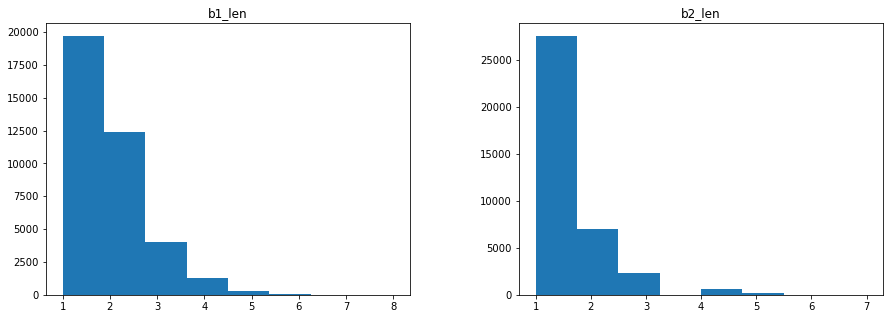

In [47]:
df.hist(['b1_len', 'b2_len'], grid= False, figsize= (15,5), bins = 8)

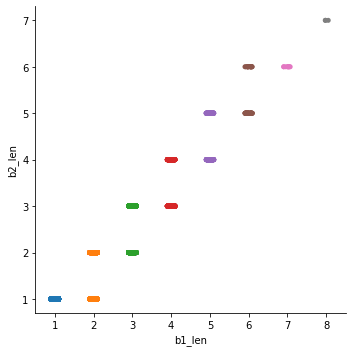

In [54]:
sns.catplot(x= 'b1_len', y= 'b2_len', data= df)

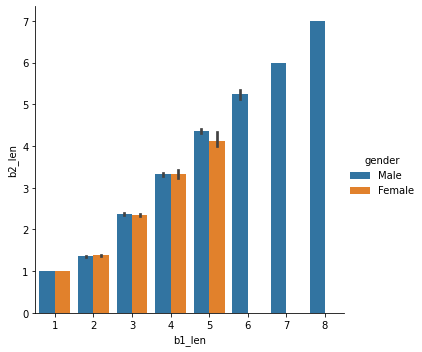

In [50]:
sns.catplot(x= 'b1_len', y= 'b2_len', hue= 'gender', kind= 'bar', data= df)

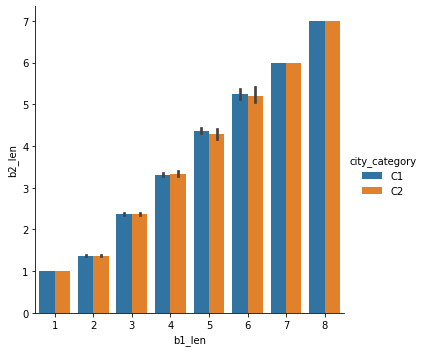

In [55]:
sns.catplot(x= 'b1_len', y= 'b2_len', hue= 'city_category', kind= 'bar', data= df)

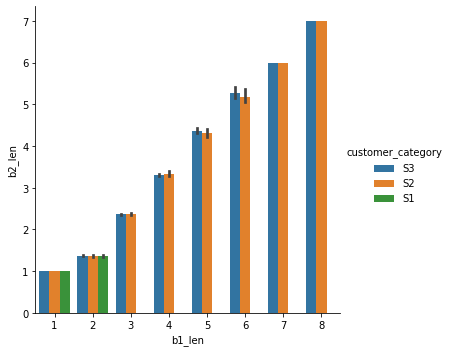

In [56]:
sns.catplot(x= 'b1_len', y= 'b2_len', hue= 'customer_category', kind= 'bar', data= df)

<AxesSubplot:>

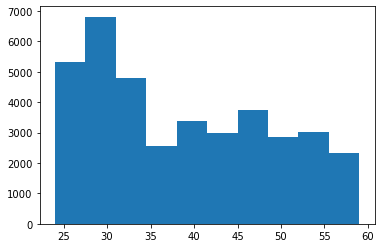

In [165]:
df['age'].hist(grid= False)

- Females are unlikely to subscribe to more number of products
- Number of products subscribed later have linear relationship with number of products subscribed to currently

In [161]:
df.corr()

,age,vintage,is_active,b1_len,b2_len
age,1.000000,0.000117,0.006373,0.009051,0.008582
vintage,0.000117,1.000000,0.170719,0.114441,0.111682
is_active,0.006373,0.170719,1.000000,0.201344,0.213980
b1_len,0.009051,0.114441,0.201344,1.000000,0.852740
b2_len,0.008582,0.111682,0.213980,0.852740,1.000000


### Split data

### Transform product data to one-hot encoded form

In [75]:
# binarize b1, b2
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(df['b1_proc'])


MultiLabelBinarizer()

In [86]:
mlb.classes_

array(['P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P2', 'P20', 'P21', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9'], dtype=object)

In [85]:
df['b1_proc'][0][0]

'P16'

In [101]:
# Encode the product columns
df['b1_enc'] = df['b1_proc'].apply(lambda x: mlb.transform([x]))
df['b2_enc'] = df['b2_proc'].apply(lambda x: mlb.transform([x]))

In [334]:
type(df['b1_enc'][0])

numpy.ndarray

In [156]:
res= df['b2_enc'][0]
str(list(mlb.inverse_transform(res)[0]))

"['P8']"

## Modelling

In [173]:
full = pd.read_csv('train.csv')
full.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


In [176]:
full = std_col_names(full)
full.head()

,customer_id,gender,age,vintage,is_active,city_category,customer_category,b1,b2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


### Split Data

In [392]:
from sklearn.model_selection import train_test_split

In [393]:
x_train, x_val, y_train, y_val = train_test_split(full[full.columns.to_list()[1:-1]], full['b2'], test_size= 0.15, random_state= 42)

In [394]:
x_train = x_train.reset_index(drop= True)
x_val = x_val.reset_index(drop= True)

y_train = y_train.reset_index(drop= True)
y_val = y_val.reset_index(drop=True)

In [395]:
def process_prod(df):
    if isinstance(df, pd.DataFrame):
        df['b1_proc'] = df['b1'].apply(lambda x: x.lstrip("['").rstrip("']").split("', '"))
        df['b1_len'] = df['b1_proc'].apply(lambda x: len(x))
        return df
    else:
        target = df.apply(lambda x: x.lstrip("['").rstrip("']").split("', '"))
        return target
    


In [396]:
x_train = process_prod(x_train)
y_train_proc = process_prod(y_train)

In [397]:
def generate_class_list():
    classes_list = []
    for i in range(22):
        classes_list.append(f'P{i}')
    classes_list[0] = 'P00'
    return classes_list
prod_list = generate_class_list()

In [398]:
mlb_split = MultiLabelBinarizer(classes = prod_list)
mlb_split.fit(x_train['b1'])
mlb_split.classes_

array(['P00', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21'], dtype=object)

In [399]:
def binarize_prod(df, mlb):
    if isinstance(df, pd.DataFrame):
        df['b1_enc'] = df['b1_proc'].apply(lambda x: mlb.transform([x])[0])
        return df
    else:
        target = df.apply(lambda x: mlb.transform([x])[0])
        return target   

In [400]:
x_train = binarize_prod(x_train, mlb_split)
y_train_enc = binarize_prod(y_train_proc, mlb_split)

In [403]:
# Process validation too
x_val = process_prod(x_val)
y_val_proc = process_prod(y_val)

x_val = binarize_prod(x_val, mlb_split)
y_val_enc = binarize_prod(y_val_proc, mlb_split)

In [404]:
x_val.head()

,gender,age,vintage,is_active,city_category,customer_category,b1,b1_proc,b1_len,b1_enc
0,Female,27,16,0,C2,S2,"['P12', 'P16']","[P12, P16]",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,Female,25,15,0,C1,S2,['P13'],[P13],1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,Female,31,18,1,C2,S3,['P13'],[P13],1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,Male,41,21,0,C2,S1,['P16'],[P16],1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Male,44,14,0,C2,S3,"['P11', 'P12', 'P21']","[P11, P12, P21]",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."


In [773]:
y_val_enc.head()

0    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
Name: b2, dtype: object

In [592]:
num_cols = ['age', 'vintage', 'b1_len'] #, 'b1_enc'
cat_cols = ['gender',  'is_active', 'city_category', 'customer_category']

In [408]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse= False)
ohe.fit(x_train[cat_cols])

OneHotEncoder(sparse=False)

In [409]:
encoded_cols = list(ohe.get_feature_names(cat_cols))
encoded_cols

['gender_Female',
 'gender_Male',
 'is_active_0',
 'is_active_1',
 'city_category_C1',
 'city_category_C2',
 'customer_category_S1',
 'customer_category_S2',
 'customer_category_S3']

In [410]:
x_train[encoded_cols] = ohe.transform(x_train[cat_cols])
x_val[encoded_cols] = ohe.transform(x_val[cat_cols])

In [411]:
assert x_train[num_cols+encoded_cols].columns.to_list() == x_val[num_cols+encoded_cols].columns.to_list()

## Training Model

In [579]:
y_train_fin = y_train_enc
# y_train_fin.shape, yy.shape, y_train_enc.shape

y_reshape = np.concatenate(y_train_fin, axis= 0).reshape(32085, 22)


In [607]:
b_arr =  (x_train['b1_enc']).to_numpy()
b_reshape = np.concatenate(b_arr, axis= 0).reshape(32085, 22)
b = pd.DataFrame(b_reshape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32085 entries, 0 to 32084
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       32085 non-null  int64
 1   1       32085 non-null  int64
 2   2       32085 non-null  int64
 3   3       32085 non-null  int64
 4   4       32085 non-null  int64
 5   5       32085 non-null  int64
 6   6       32085 non-null  int64
 7   7       32085 non-null  int64
 8   8       32085 non-null  int64
 9   9       32085 non-null  int64
 10  10      32085 non-null  int64
 11  11      32085 non-null  int64
 12  12      32085 non-null  int64
 13  13      32085 non-null  int64
 14  14      32085 non-null  int64
 15  15      32085 non-null  int64
 16  16      32085 non-null  int64
 17  17      32085 non-null  int64
 18  18      32085 non-null  int64
 19  19      32085 non-null  int64
 20  20      32085 non-null  int64
 21  21      32085 non-null  int64
dtypes: int64(22)
memory usage: 5.4 MB


In [701]:
x_train_fin = pd.concat([x_train[num_cols+encoded_cols],b], axis= 1)

In [628]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)

clf = MultiOutputClassifier(forest).fit(x_train_fin, y_reshape)

In [637]:
from sklearn.metrics import average_precision_score
average_precision_score(y_reshape, train_pred, average= 'micro')

0.9155727684756749

##### Tune Model

In [807]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

In [810]:
my_score = make_scorer(average_precision_score)

In [ ]:
base = RandomForestClassifier(random_state= 42)
distrib = {
    'n_estimators': [10, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20],
    'max_features':['sqrt', 'log2', 5, 10, 15],
    'ccp_alpha' : [0.01, 0.05, 0.1, .05],
    'max_samples': [0.15, 0.25, 0.33, 0.5],
    'class_weight': ['balanced', 'balanced_subsample']
}

tuner = RandomizedSearchCV(base, distrib, random_state = 42, verbose= 1)

tuner.fit(x_train_fin, y_reshape)

In [795]:
tuner.best_estimator_

RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features=10,
                       max_samples=0.15, n_estimators=10, random_state=42,
                       verbose=2)

In [799]:
tuner.best_score_

0.06417328969923641

In [805]:
tuner.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [800]:
tuned_rf = RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features=10,
                       max_samples=0.15, n_estimators=10, random_state=42)
# tune_clf = MultiOutputClassifier(tuned_rf).fit(x_train_fin, y_reshape)
tuned_rf.fit(x_train_fin, y_reshape)

RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features=10,
                       max_samples=0.15, n_estimators=10, random_state=42)

#### Validation

In [689]:
y_val_reshape.shape

(5663, 22)

In [704]:
x_val_b_arr =  (x_val['b1_enc']).to_numpy()
x_val_reshape = pd.DataFrame(np.concatenate(x_val_b_arr, axis= 0).reshape(len(x_val), 22))
x_val_fin = pd.concat([x_val[num_cols+encoded_cols],x_val_reshape], axis= 1)

In [688]:
y_val_reshape = np.concatenate(y_val_enc, axis= 0).reshape(len(y_val), 22)


In [698]:
val_pred = clf.predict(x_val_fin)

average_precision_score(y_val_reshape, val_pred, average= 'micro')

0.30866932122257423

In [804]:
tuned_val_pred_moc = tune_clf.predict(x_val_fin)

tuned_val_pred_rf = tuned_rf.predict(x_val_fin)

moc_map = average_precision_score(y_val_reshape, tuned_val_pred_moc, average= 'micro')
rf_map = average_precision_score(y_val_reshape, tuned_val_pred_rf, average= 'micro')

print(moc_map, rf_map)

0.27576122711568585 0.13703453332804041


### Training on entire set

In [722]:
train = full.copy()[full.columns.to_list()[1:-1]]
train.head()

,gender,age,vintage,is_active,city_category,customer_category,b1
0,Male,41,14,0,C1,S3,['P16']
1,Female,47,14,1,C1,S2,"['P13', 'P20']"
2,Female,59,14,0,C2,S2,['P11']
3,Female,32,16,0,C1,S2,"['P8', 'P13']"
4,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']"


In [723]:
train = process_prod(train)
target_proc = process_prod(full['b2'])

In [724]:
mlb_full = MultiLabelBinarizer(classes= prod_list)
mlb_full.fit(train['b1_proc'])

MultiLabelBinarizer(classes=['P00', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
                             'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14',
                             'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21'])

In [725]:
train = binarize_prod(train, mlb_split)
target_enc = binarize_prod(target_proc, mlb_split)

In [726]:
ohe2 = OneHotEncoder(sparse= False)
ohe2.fit(train[cat_cols])

OneHotEncoder(sparse=False)

In [727]:
train[encoded_cols] = ohe.transform(train[cat_cols])

In [728]:
target_reshape = np.concatenate(target_enc, axis= 0).reshape(len(train), 22)


In [729]:
train_b_arr =  (train['b1_enc']).to_numpy()
train_reshape = pd.DataFrame(np.concatenate(train_b_arr, axis= 0).reshape(len(train), 22))

In [730]:
forest2 = RandomForestClassifier(random_state=1)
train_fin = pd.concat([train[num_cols+encoded_cols],train_reshape], axis= 1)
clf2 = MultiOutputClassifier(forest2).fit(train_fin, target_reshape)

In [812]:
tuned_full = MultiOutputClassifier(tuned_rf).fit(train_fin, target_reshape)

### Predict on test

In [731]:
test = pd.read_csv('test.csv')
test = std_col_names(test)

In [734]:
test = process_prod(test)
# target_proc = process_prod(train['b1'])

test = binarize_prod(test, mlb_full)
# target_enc = binarize_prod(target_proc, mlb_split)

test[encoded_cols] = ohe2.transform(test[cat_cols])

test_b_arr =  (test['b1_enc']).to_numpy()
test_reshape = pd.DataFrame(np.concatenate(test_b_arr, axis= 0).reshape(len(test), 22))

test_fin = pd.concat([test[num_cols+encoded_cols],test_reshape], axis= 1)


In [771]:
test_preds = clf2.predict(test_fin)

out_test = [list(ele) for ele in mlb_full.inverse_transform(test_preds)]

pd.DataFrame(list(zip(test['customer_id'], out_test)),columns= ['Customer_ID', 'Product_Holding_B2'], index= None).to_csv('sub1.csv', index= None)

In [813]:
tuned_test_preds = tuned_full.predict(test_fin)

out_test = [list(ele) for ele in mlb_full.inverse_transform(tuned_test_preds)]

pd.DataFrame(list(zip(test['customer_id'], out_test)),columns= ['Customer_ID', 'Product_Holding_B2'], index= None).to_csv('sub2.csv', index= None)

In [833]:
np.array(train_fin.iloc[0]).reshape(1,-1)

array([[41., 14.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [860]:
tuned_full.predict(test_fin)[0]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [823]:
tuned_full.predict_proba()

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [835]:
target_reshape[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Extracting results

In [861]:
import joblib

joblib.dump()

In [146]:
b2_out = df['b2_enc'].apply(lambda x: list(mlb.inverse_transform(x)[0]))
b1_out = df['b1_enc'].apply(lambda x: list(mlb.inverse_transform(x)[0]))

In [145]:
b2_out.to_csv('b2.csv')

In [128]:
list(b1_out[0][0])

['P16']

In [142]:
b1_out

0                 [(P16,)]
1             [(P13, P20)]
2                 [(P11,)]
3              [(P13, P8)]
4        [(P16, P17, P21)]
               ...        
37743             [(P16,)]
37744    [(P16, P17, P21)]
37745             [(P14,)]
37746         [(P12, P13)]
37747         [(P16, P17)]
Name: b1_enc, Length: 37748, dtype: object